In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# importing Worldhappiness data
data = pd.read_csv('/Users/juhimishra/Downloads/DSData-master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## EDA

In [3]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Here Country and region are object values so we need to encode the same to change them in numeric value

In [4]:
lab_enc = LabelEncoder()
ohe = OneHotEncoder()

In [5]:
df2 = lab_enc.fit_transform(data['Country'])
pd.Series(df2)

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Length: 158, dtype: int64

In [6]:
data['Country'] = df2

In [7]:
df3 = lab_enc.fit_transform(data['Region'])
pd.Series(df3)

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Length: 158, dtype: int64

In [8]:
data['Region']=df3

In [9]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From this describe data we concluded following points mentioned below:
1. There are no missing values 
2. Between Mean and std difference is high so no need to ractify the same.
3. as we can see the differences between quartile range are high so there may be a chance of skweness and outliers.

In [11]:
data.shape

(158, 12)

Total no of rows - 158 and column - 12

In [12]:
# Checking any missing values are there or not

data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in data

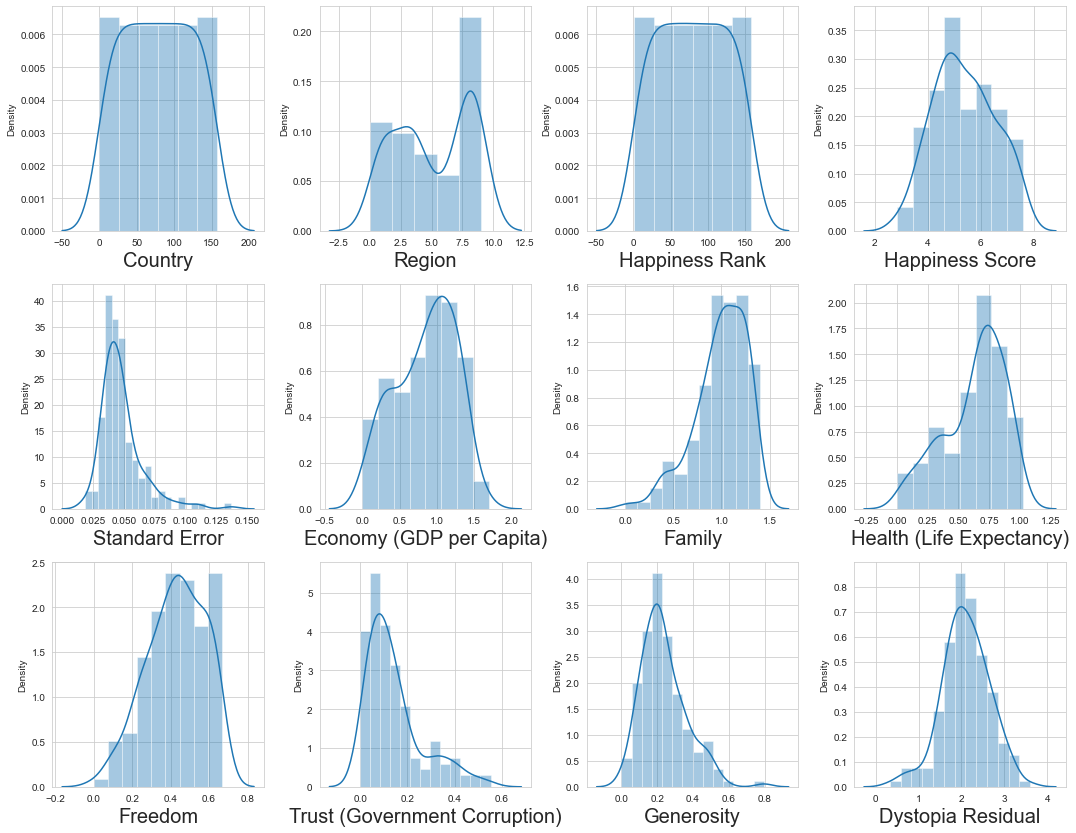

In [17]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

Here we checked the skewness present in data with the help of scatter plot. And according to graph come to conclusion
that below mentioned features are skewed data.
1. Standard Error
2. Family
3. Health (Life Expectancy)
4. Trust (Goverment Corruption)
5. Generosity

In [13]:
data.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [14]:
# Removing Skewness Using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [15]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [16]:
features = ['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']

In [18]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [17]:
data[features] = scaler.fit_transform(data[features].values)

In [18]:
data[features].head()

,Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,-0.972226,1.669206,1.491765,1.773991,0.622391
1,0.309350,2.012132,1.532348,0.315993,1.480995
2,-1.062017,1.739586,1.085223,1.906792,0.927973
3,-0.503610,1.553118,1.147600,1.624007,0.964080
4,-0.823548,1.501726,1.270179,1.503484,1.592224


In [30]:
data[features].skew()

Standard Error                  -0.020092
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Trust (Government Corruption)    0.185965
Generosity                       0.013320
dtype: float64

So we removed the skewness from the data. from the help of above skew code we can see that there is no skewness as the data 
is between -5 to +5

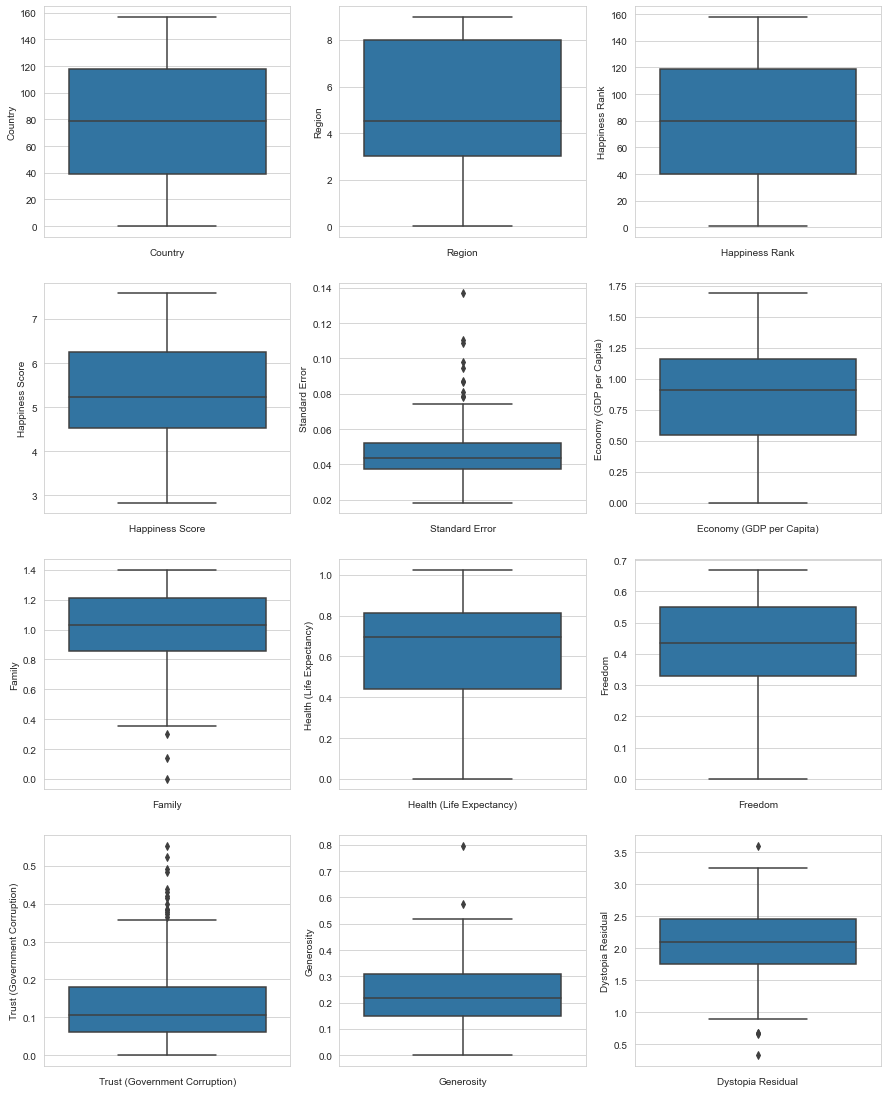

In [18]:
plt.figure(figsize=(15,50))

graph=1

for column in data.columns:
    if graph<=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(y=data[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

With the help of boxplot we come to conclude that below mentioned features are having outliers:
1. standard error
2. family
3. Trust (Goverment Corruption)
4. Generosity
5. Dystopia Residual

Using z score method to remove outliers from data

In [19]:
from scipy.stats import zscore

In [20]:
z = np.abs(zscore(data))
threshold = 3
np.where(z>3)

(array([ 20,  25, 155]), array([ 4,  4, 11]))

In [21]:
data_new_z = data[(z<3).all(axis=1)]
data_new_z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,-0.972226,1.39651,1.669206,1.491765,0.66557,1.773991,0.622391,2.51738
1,58,9,2,7.561,0.309350,1.30232,2.012132,1.532348,0.62877,0.315993,1.480995,2.70201
2,37,9,3,7.527,-1.062017,1.32548,1.739586,1.085223,0.64938,1.906792,0.927973,2.49204
3,105,9,4,7.522,-0.503610,1.45900,1.553118,1.147600,0.66973,1.624007,0.964080,2.46531
4,24,5,5,7.427,-0.823548,1.32629,1.501726,1.270179,0.63297,1.503484,1.592224,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,7,153,3.575,-1.338909,0.31982,-1.970375,-1.320450,0.23414,-0.196665,1.077647,1.95210
153,118,8,154,3.465,-0.916014,0.22208,-0.959885,-0.939459,0.59201,2.012856,0.065304,0.67042
154,13,8,155,3.340,-0.719479,0.28665,-1.896644,-1.276496,0.48450,-0.433835,-0.334169,1.63328
156,21,8,157,2.905,1.926902,0.01530,-1.796803,-1.525700,0.11850,-0.151946,-0.194829,1.83302


In [47]:
data_new_z.shape

(155, 12)

In [22]:
# Percentage loss of data

In [23]:
Data_loss = ((158-155)/158)*100
Data_loss

1.89873417721519

So from above calculation concluded that our data loss is 1.89% which is acceptable.Removed outlier using Zscore method

Data Cleaning process completed now will go for further step that is training our model.

Splitted data into x and y where x is our feature while y is our target data

In [24]:
x = data.drop(columns = ['Happiness Rank'])
y = data['Happiness Rank']

In [25]:
x

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,-0.972226,1.39651,1.669206,1.491765,0.66557,1.773991,0.622391,2.51738
1,58,9,7.561,0.309350,1.30232,2.012132,1.532348,0.62877,0.315993,1.480995,2.70201
2,37,9,7.527,-1.062017,1.32548,1.739586,1.085223,0.64938,1.906792,0.927973,2.49204
3,105,9,7.522,-0.503610,1.45900,1.553118,1.147600,0.66973,1.624007,0.964080,2.46531
4,24,5,7.427,-0.823548,1.32629,1.501726,1.270179,0.63297,1.503484,1.592224,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,-0.916014,0.22208,-0.959885,-0.939459,0.59201,2.012856,0.065304,0.67042
154,13,8,3.340,-0.719479,0.28665,-1.896644,-1.276496,0.48450,-0.433835,-0.334169,1.63328
155,136,4,3.006,0.399137,0.66320,-1.690664,0.262933,0.15684,0.738915,1.659336,0.32858
156,21,8,2.905,1.926902,0.01530,-1.796803,-1.525700,0.11850,-0.151946,-0.194829,1.83302


In [26]:
y

0        1
1        2
2        3
3        4
4        5
      ... 
153    154
154    155
155    156
156    157
157    158
Name: Happiness Rank, Length: 158, dtype: int64

In [27]:
# Scaling data
from sklearn.preprocessing import StandardScaler

In [28]:
# Instantiating StandardScaler
scaler = StandardScaler()

In [29]:
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.23877001,  1.30025593,  1.93736005, ...,  1.7739906 ,
         0.62239052,  0.75825809],
       [-0.44946522,  1.30025593,  1.91458063, ...,  0.31599326,
         1.48099497,  1.09285682],
       [-0.90989302,  1.30025593,  1.88479215, ...,  1.90679206,
         0.92797277,  0.71233526],
       ...,
       [ 1.26069514, -0.37544095, -2.0761992 , ...,  0.73891461,
         1.65933594, -3.20843049],
       [-1.26069514,  0.96511655, -2.1646885 , ..., -0.15194623,
        -0.19482942, -0.48198451],
       [ 1.37032081,  0.96511655, -2.22251319, ..., -0.06732622,
        -0.49041465, -0.96361241]])

In [30]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [98]:
lr = LinearRegression()
rf=RandomForestRegressor()
sv = SVR()

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.30,random_state=42)

In [100]:
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred=lr.predict(x_test)

In [102]:
print(r2_score(y_pred,y_test))

0.9838615920086489


In [105]:
print(cross_val_score(lr,x_scaler,y,cv=2).mean())

0.7355039494224267


In [106]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
y_pred=rf.predict(x_test)

In [108]:
print(r2_score(y_pred,y_test))

0.9987062134999058


In [109]:
print(cross_val_score(rf,x_scaler,y,cv=3).mean())

-2.592678890341183
